In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy        import signal
from scipy.signal import butter
from scipy.signal import cheby1

In [2]:
def freqz_plot(b,a,sr):
    w, h = signal.freqz(b,a)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [51]:
n  = 2
fc = 10
fs = 50.
wc = 2*np.pi*fc
#wc = 2*fs*np.tan(np.pi*fc/fs)

b,a = butter(n, wc, analog=True, output='ba')

print b
print a

[ 5278.64045]
[  1.00000000e+00   1.02748630e+02   5.27864045e+03]


In [52]:
bd, ad = signal.bilinear(b,a,fs)
print '[%s]\n[%s]'%(bd,ad)

[[ 0.20657208  0.41314417  0.20657208]]
[[ 1.         -0.36952738  0.19581571]]


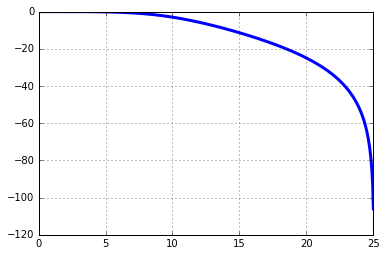

In [53]:
w, W, H, = freqz_plot(bd,ad,fs)

plt.plot(w,H,'b',linewidth=3)
plt.grid(True)
plt.show()

[[ 0.20657208  0.41314417  0.20657208]]
[[ 1.         -0.36952738  0.19581571]]


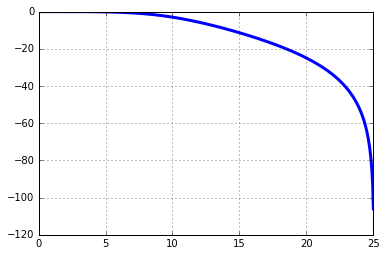

In [54]:
bd_f, ad_f = butter(n, 2*fc/fs)

print '[%s]\n[%s]'%(bd_f,ad_f)

w, W, H, = freqz_plot(bd_f,ad_f,fs)

plt.plot(w,H,'b',linewidth=3)
plt.grid(True)
plt.show()


In [55]:
print bd
print bd_f
print bd_f/bd
print ''
print ad
print ad_f
print ad_f/ad

[ 0.20657208  0.41314417  0.20657208]
[ 0.20657208  0.41314417  0.20657208]
[ 1.  1.  1.]

[ 1.         -0.36952738  0.19581571]
[ 1.         -0.36952738  0.19581571]
[ 1.  1.  1.]


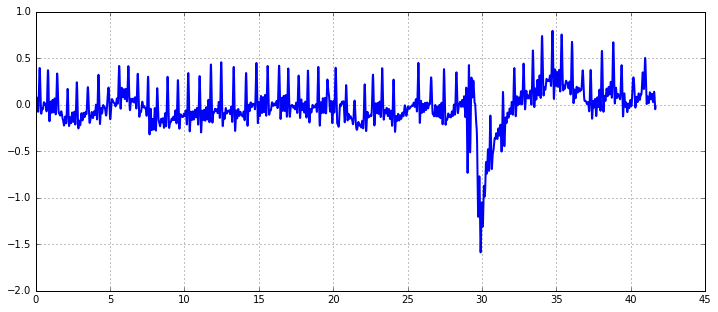

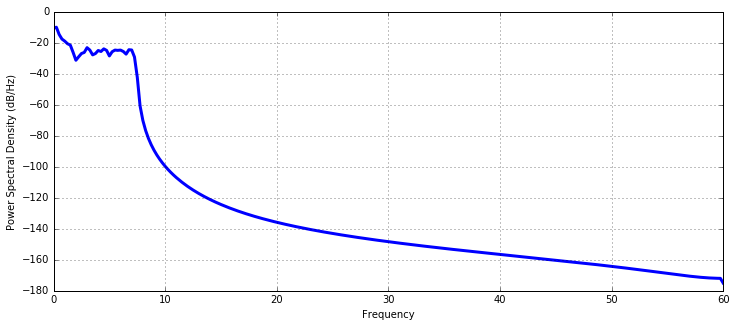

In [57]:
path  = '/home/omarpr/Dropbox/Brain/UAM/Cursos/Signals/ECG/'
fname = 'ecg.npz'

fdata = np.load( path+fname )
data  = fdata['arr_0']
fs    = 120.
t     = np.linspace( 0,data.shape[0]/fs,data.shape[0] )

tshow = 5000
plt.figure(u'Señal',figsize=(12,5))
plt.grid(True)
plt.plot( t[:tshow],-data[:tshow],linewidth=2 )

plt.figure(u'PSD',figsize=(12,5))
plt.psd( data[:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3 )
plt.show()

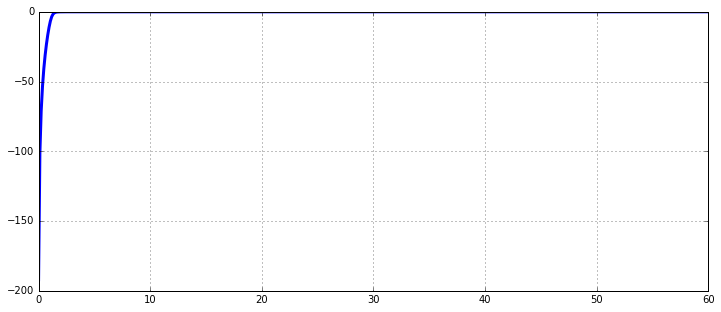

In [59]:
n   = 5
fc  = 1.2*(2/fs)
b,a = butter(n, fc, btype='high', output='ba')


w, W, H, = freqz_plot(b,a,fs)

plt.figure(u'Respuesta en frecuencia',figsize=(12,5))
plt.plot(w,H,'b',linewidth=3)
plt.grid(True)
plt.show()



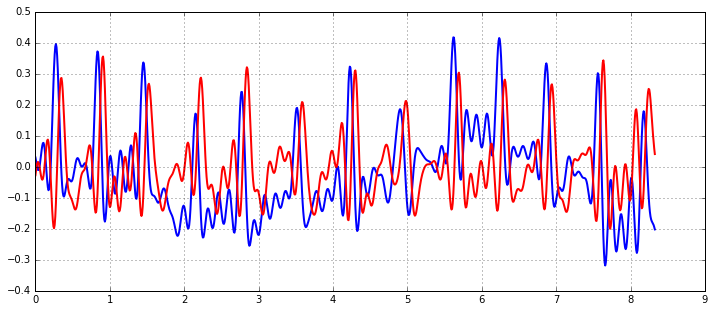

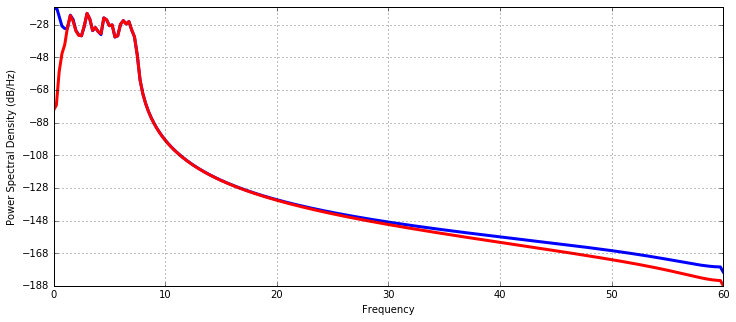

In [62]:
data_f = signal.lfilter(b,a,data)

tshow = 1000
plt.figure(u'Señal',figsize=(12,5))
plt.grid(True)
plt.plot( t[:tshow],-data  [:tshow],'b',linewidth=2 )
plt.plot( t[:tshow], data_f[:tshow],'r',linewidth=2 )

plt.figure(u'PSD',figsize=(12,5))
plt.psd( data  [:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='b' )
plt.psd( data_f[:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='r' )

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


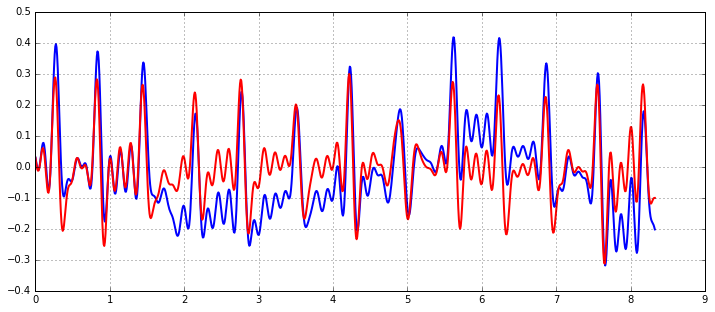

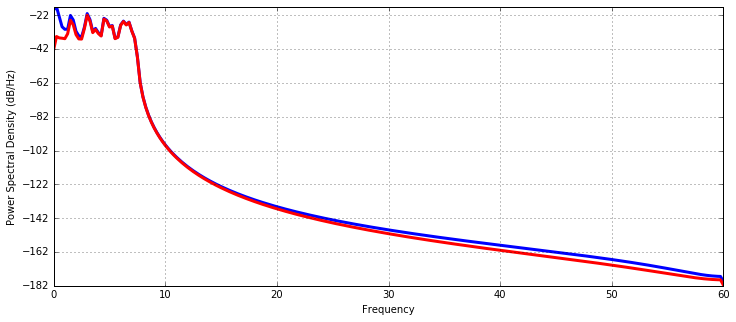

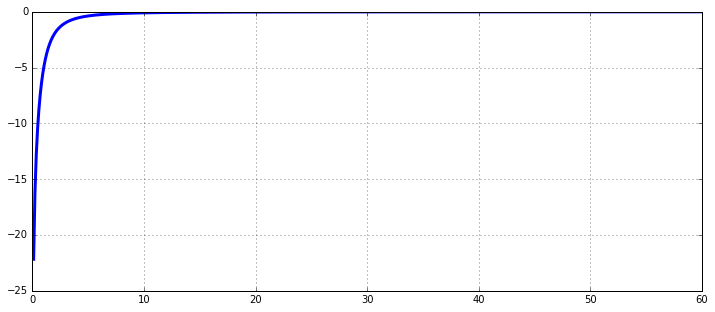

In [65]:
fc     = 1.5*(2/fs)
n      = 1
b,a    = butter(n, fc, btype='high', output='ba')
data_f = signal.lfilter(b,a,data)

tshow = 1000
plt.figure(u'Señal',figsize=(12,5))
plt.grid(True)
plt.plot( t[:tshow],-data  [:tshow],'b',linewidth=2 )
plt.plot( t[:tshow],-data_f[:tshow],'r',linewidth=2 )

plt.figure(u'PSD',figsize=(12,5))
plt.psd( data  [:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='b' )
plt.psd( data_f[:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='r' )

w, W, H, = freqz_plot(b,a,fs)
plt.figure(u'Respuesta en frecuencia',figsize=(12,5))
plt.plot(w,H,'b',linewidth=3)
plt.grid(True)

plt.show()

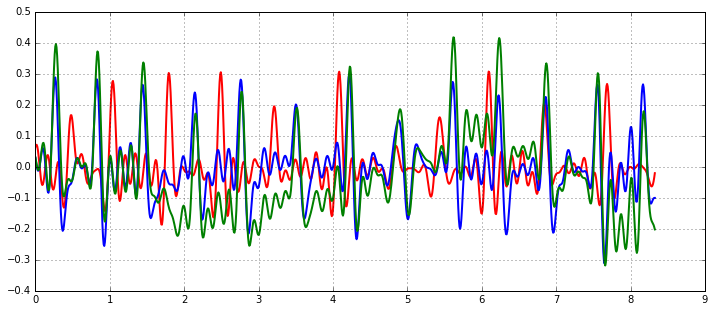

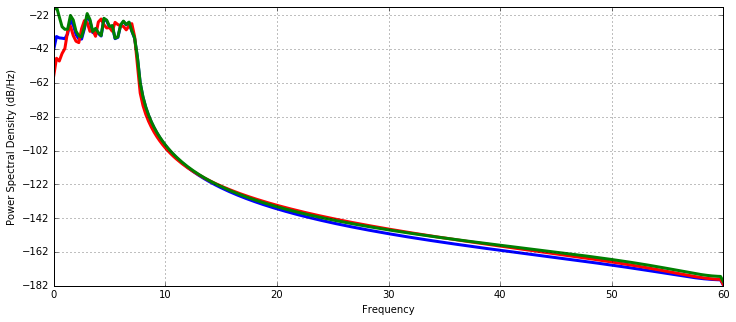

In [66]:
tshow   = 1000
data_ff = signal.lfilter(b,a,data_f[::-1])

plt.figure(u'Señal',figsize=(12,5))
plt.grid(True)
plt.plot( t[:tshow],-data_ff[:tshow],'r',linewidth=2 )
plt.plot( t[:tshow],-data_f [:tshow],'b',linewidth=2 )
plt.plot( t[:tshow],-data   [:tshow],'g',linewidth=2 )

plt.figure(u'PSD',figsize=(12,5))
plt.psd( data_f [:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='b' )
plt.psd( data_ff[:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='r' )
plt.psd( data   [:tshow],Fs=fs,NFFT=4*int(fs),linewidth=3,color='g' )

plt.show()